In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import os
import subprocess

In [231]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [296]:
# About OMNIweb data
# https://omniweb.gsfc.nasa.gov/html/ow_data.html#2
# citable reference to OMNI data is J.H. King and N.E. Papitashvili, Solar wind spatial scales in and comparisons of hourly Wind and ACE plasma and magnetic field data, J. Geophys. Res., Vol. 110, No. A2, A02209, 10.1029/2004JA010649.
# https://doi.org/10.1029/2004JA010649 ->
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JA010649

start_date = "20170101"
end_date = "20170325"

print subprocess.Popen("""curl -d "activity=retrieve&spacecraft=omni2&\
start_date={}&\
end_date={}&\
vars=4&vars=5&vars=6&vars=7&vars=8&vars=9&\
vars=10&vars=11&vars=12&vars=13&vars=14&\
vars=15&vars=16&vars=17&vars=18&vars=19&\
vars=20&vars=21&vars=22&vars=23&vars=24&\
vars=25&vars=26&vars=27&vars=28&vars=29&\
vars=30&vars=31&vars=32&vars=33&vars=34&\
vars=35&vars=36&vars=37&vars=38&vars=39&\
vars=40&vars=41&vars=42&vars=43&vars=44&\
vars=45&vars=46&vars=47&vars=48&vars=49&\
vars=50&vars=52&vars=53&vars=54&vars=55"\
 https://omniweb.sci.gsfc.nasa.gov/cgi/nx1.cgi > /home/kuiack/test_curl.txt""".format(start_date, end_date), 
                       shell=True, stdout=subprocess.PIPE).stdout.read()

In [304]:
omniweb_name = pd.read_table("/home/kuiack/test_curl.txt", skiprows=5,nrows= 49,header=None)
omniweb_name

,0
0,1 ID for IMF spacecraft
1,2 ID for SW Plasma spacecraft
2,3 # of points in IMF averages
3,4 # of points in Plasma averag.
4,"5 Scalar B, nT"
5,"6 Vector B Magnitude,nT"
6,7 Lat. Angle of B (GSE)
7,8 Long. Angle of B (GSE)
8,"9 BX, nT (GSE, GSM)"
9,"10 BY, nT (GSE)"


In [298]:
omniweb = pd.read_table("/home/kuiack/test_curl.txt", skiprows=56, skipfooter=15, sep=r"\s*")

# omniweb

/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [299]:
omni_date  = np.array([datetime.datetime(omniweb["YEAR"][i],1,1) + \
 datetime.timedelta(days=omniweb["DOY"][i]-1, hours=omniweb["HR"][i])  \
 for i in range(len(omniweb["YEAR"])) ])

RangeIndex(start=1, stop=50, step=1)

/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide
/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
/afhome/kuiack/newtrap/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


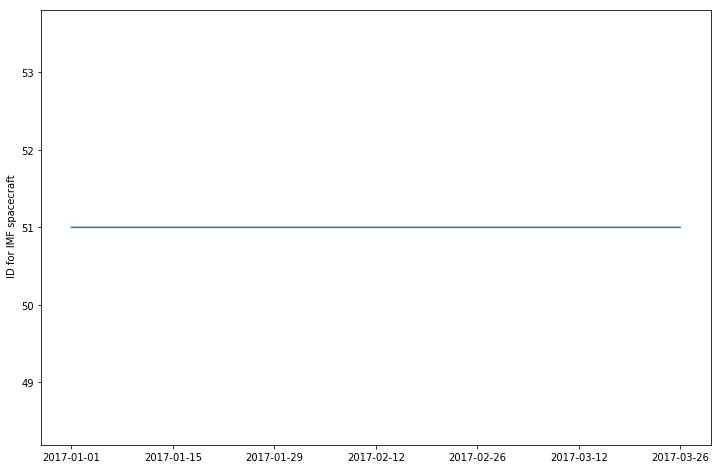

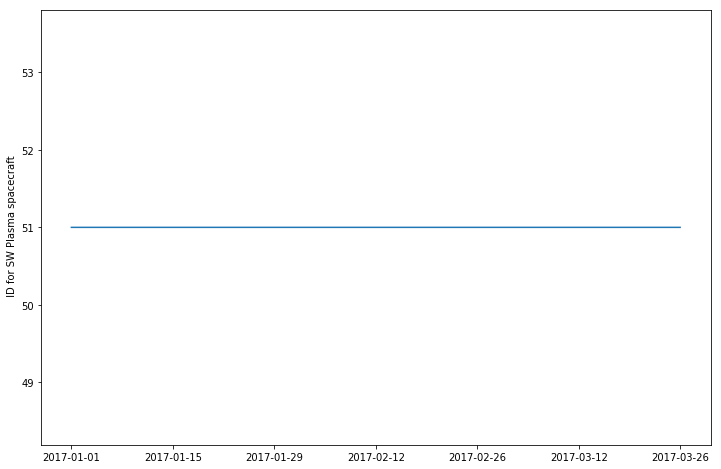

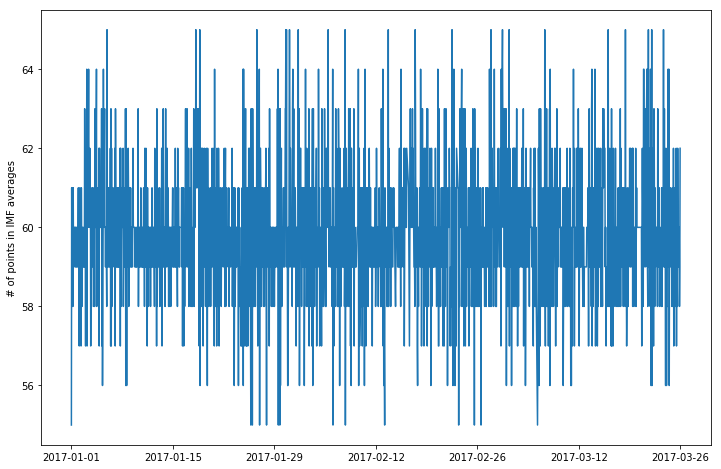

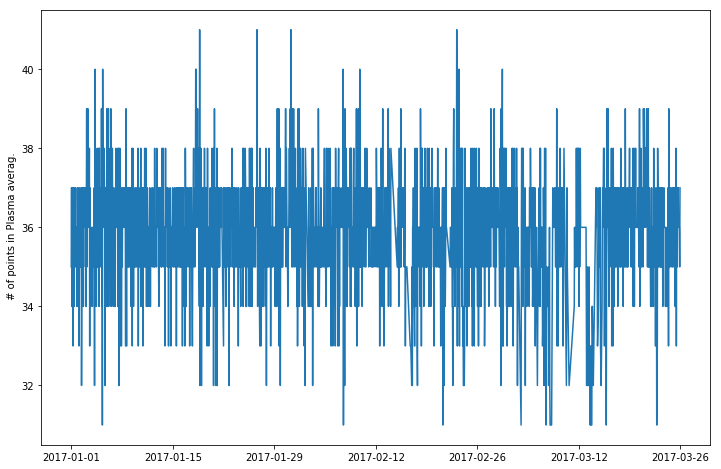

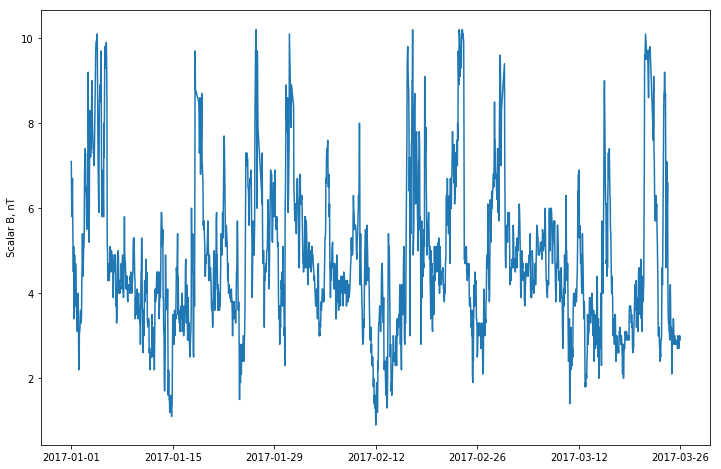

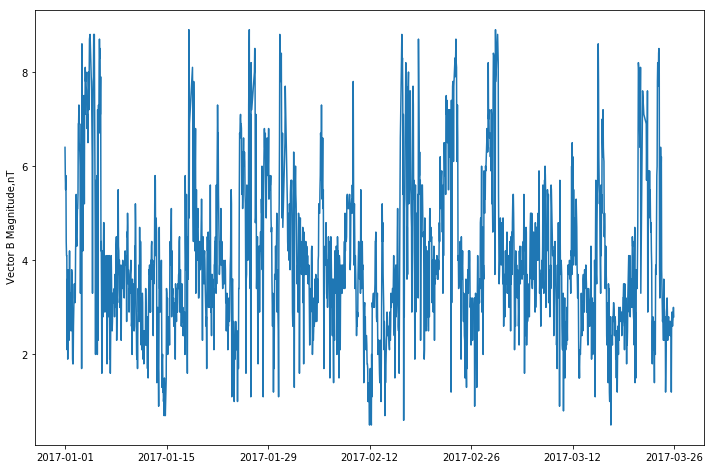

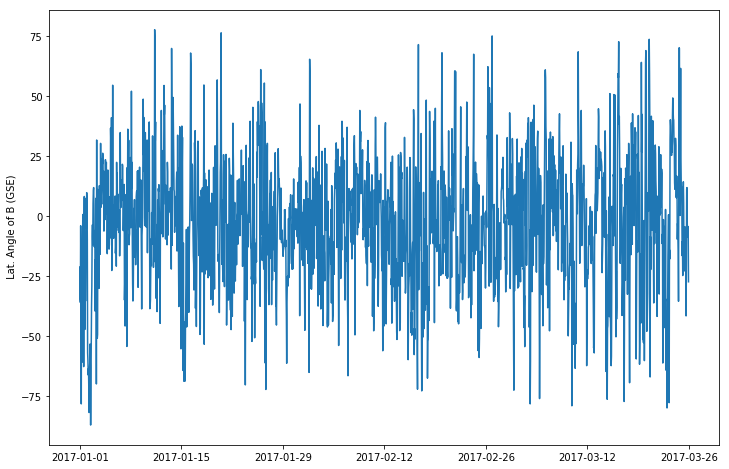

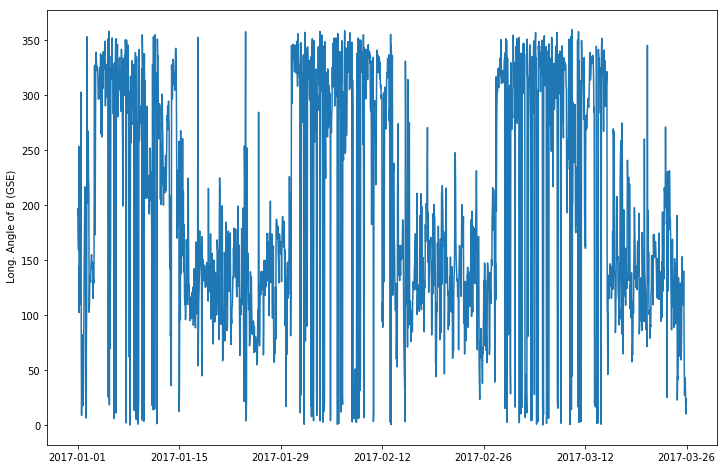

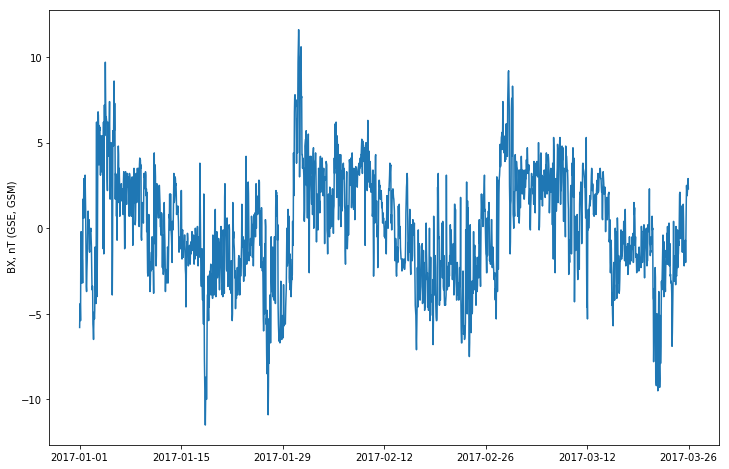

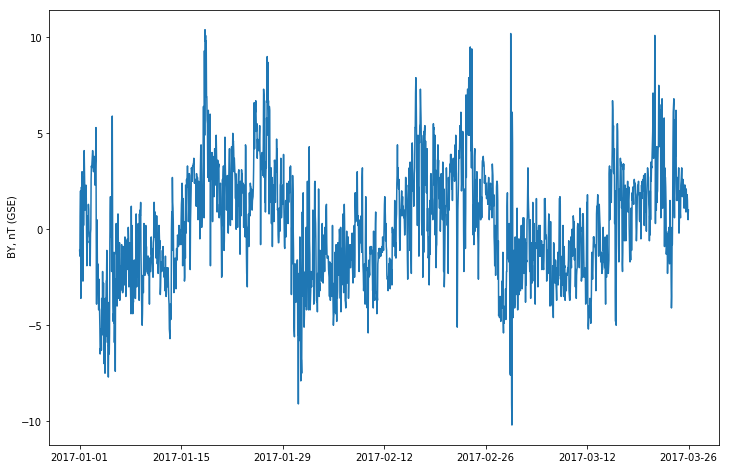

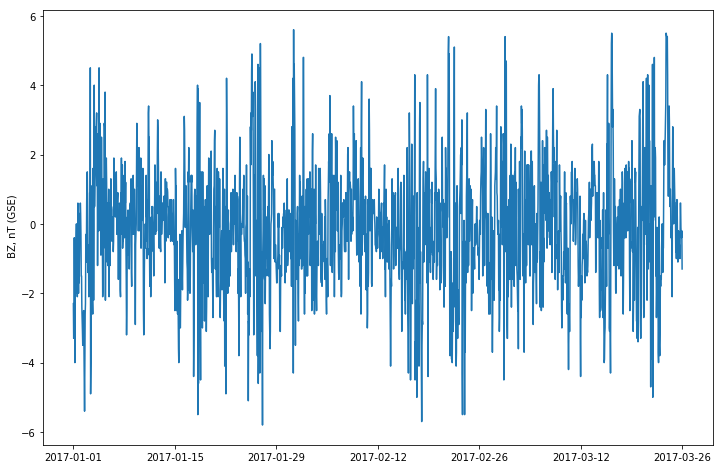

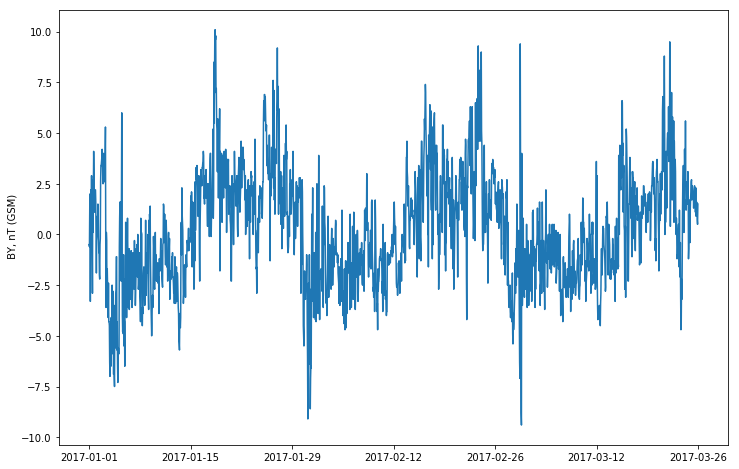

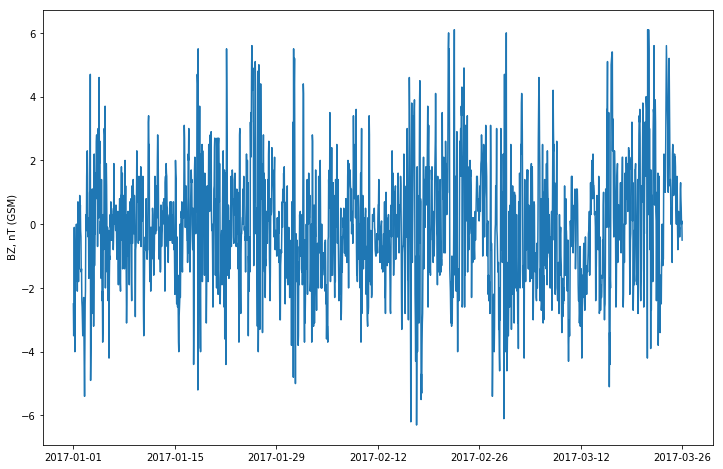

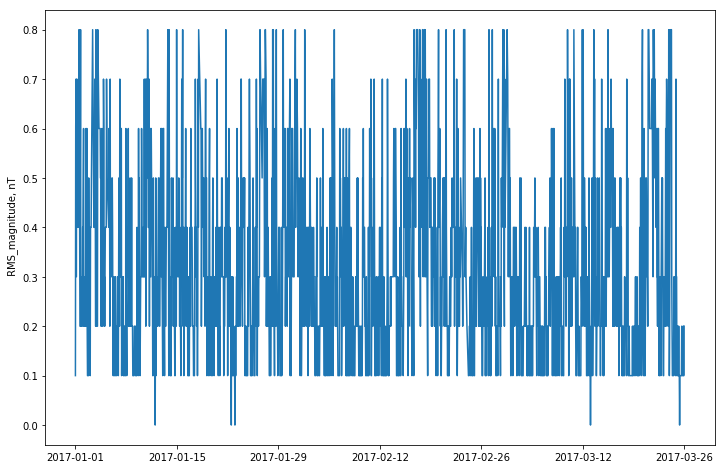

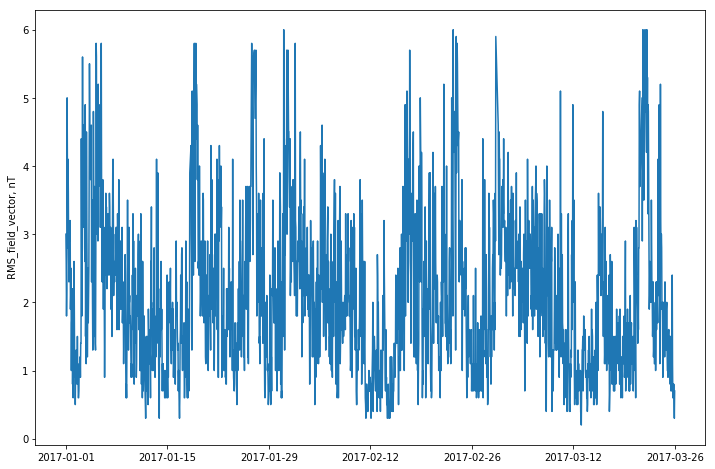

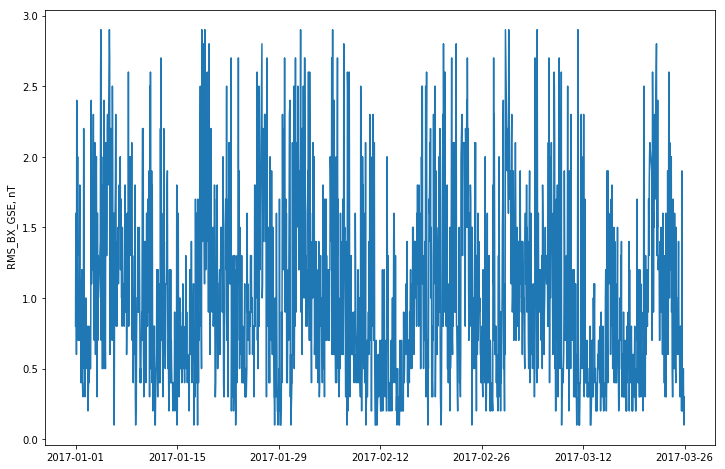

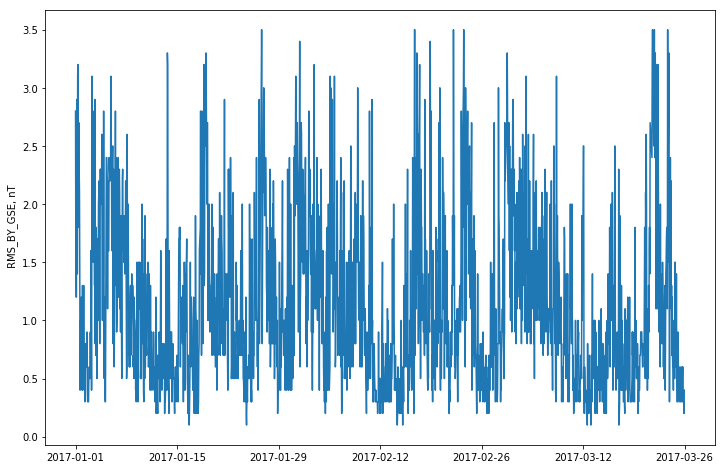

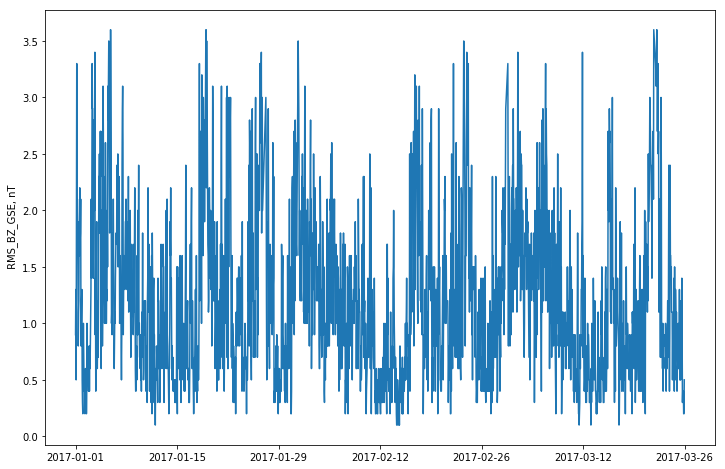

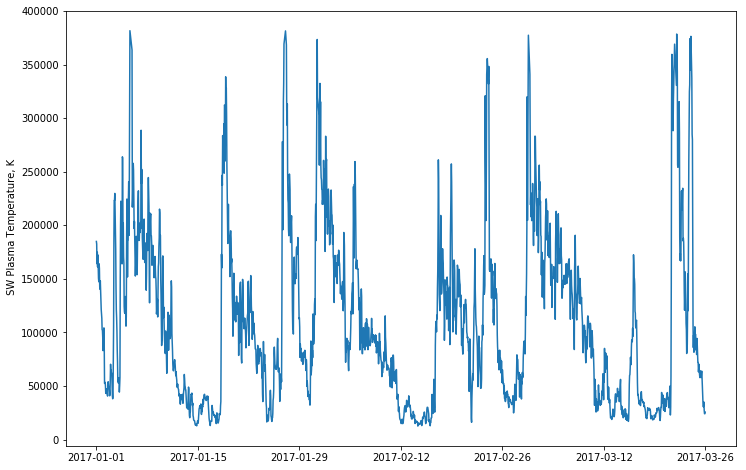

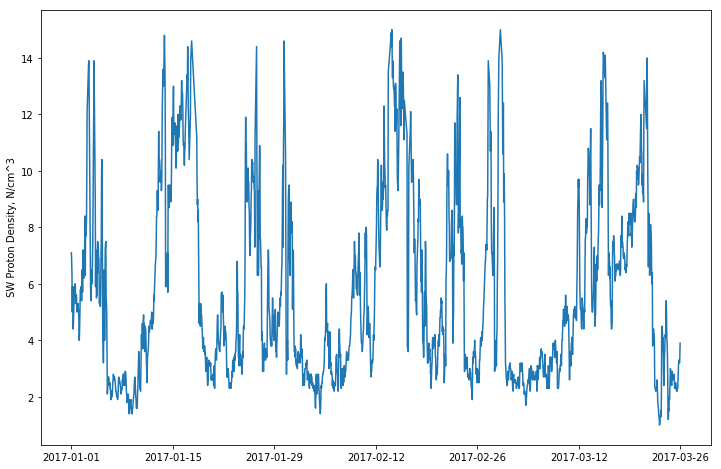

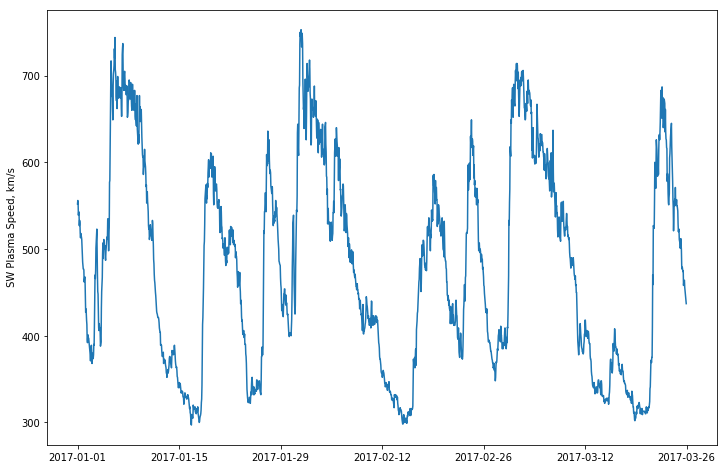

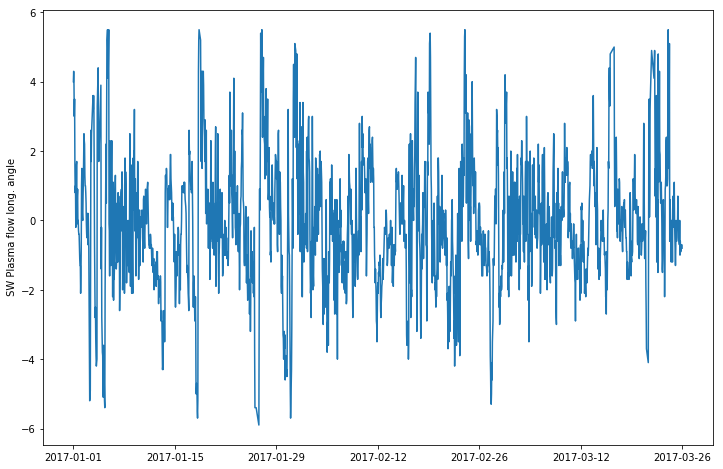

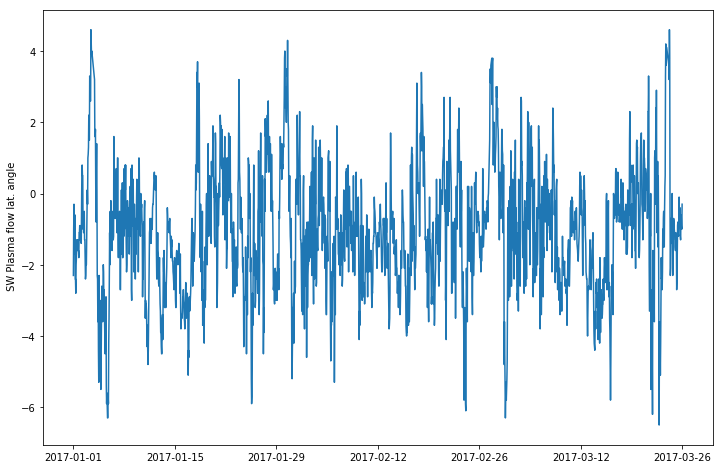

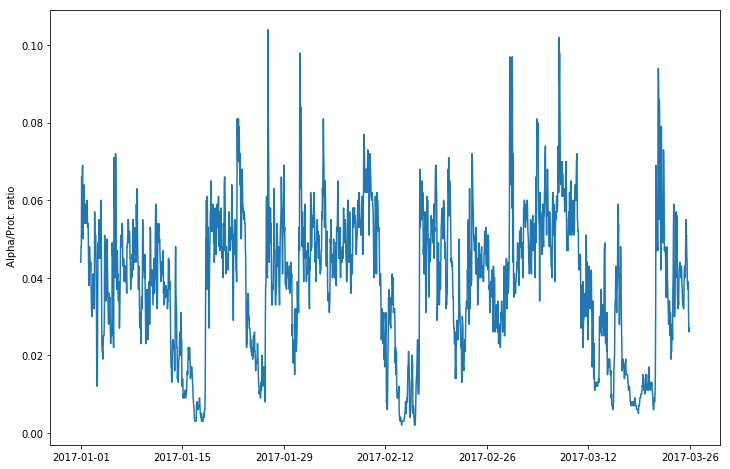

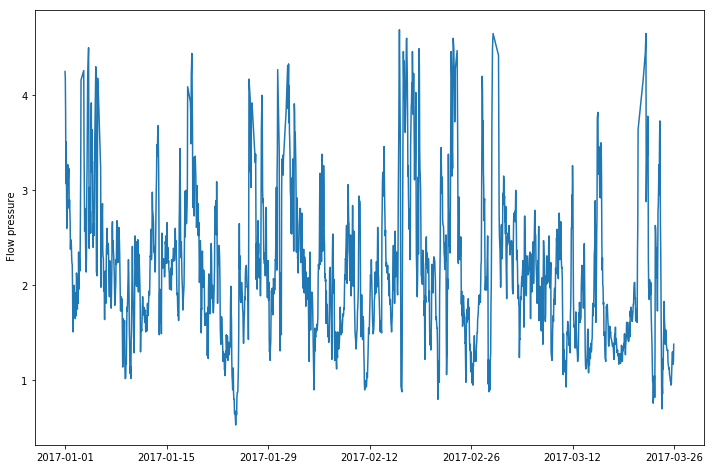

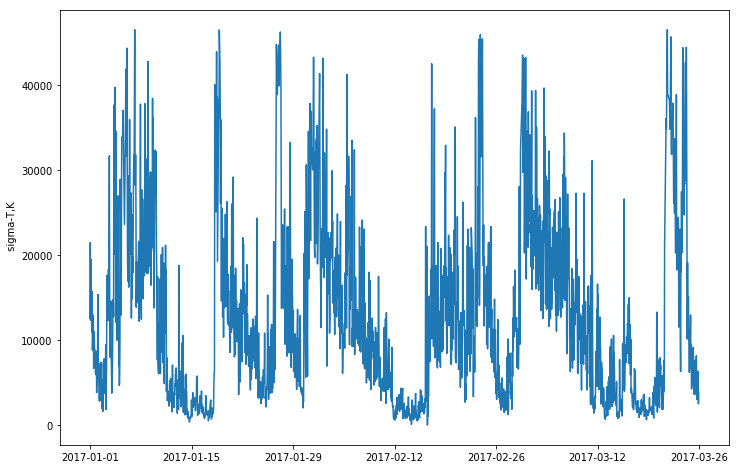

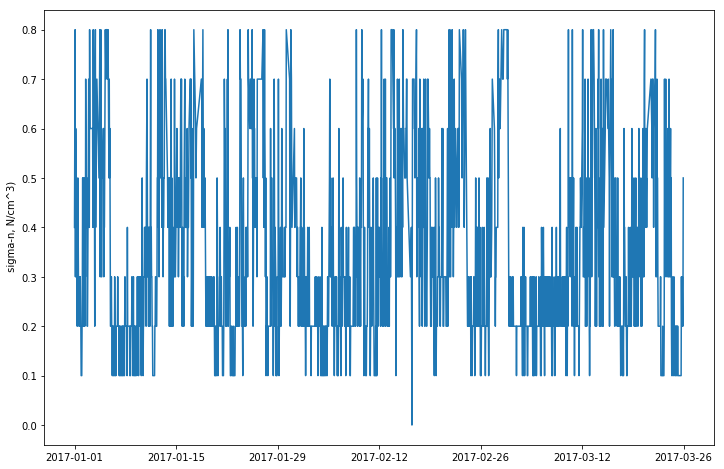

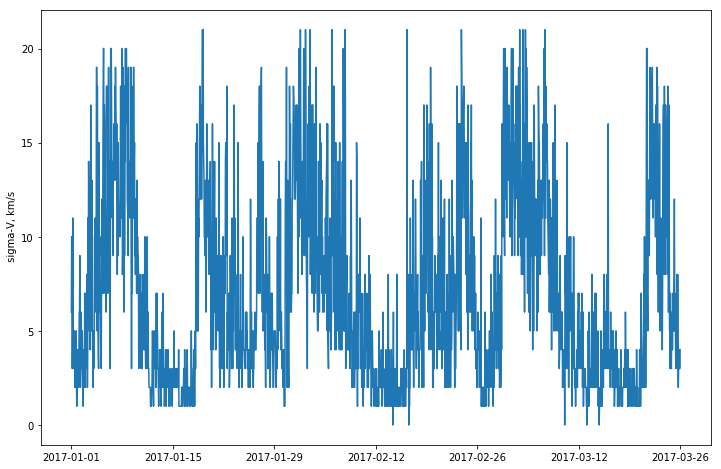

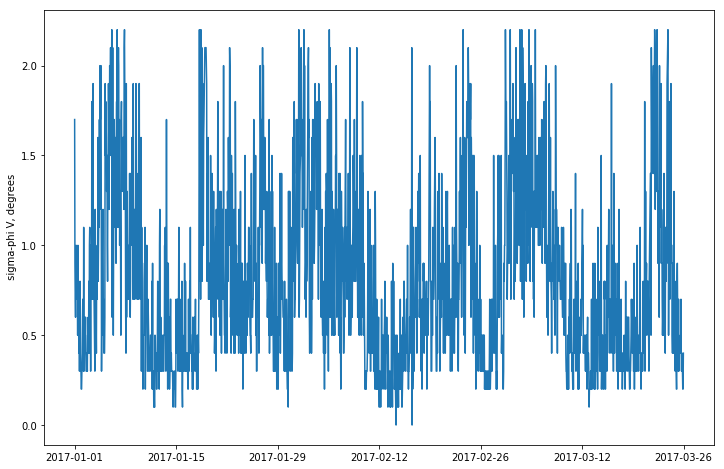

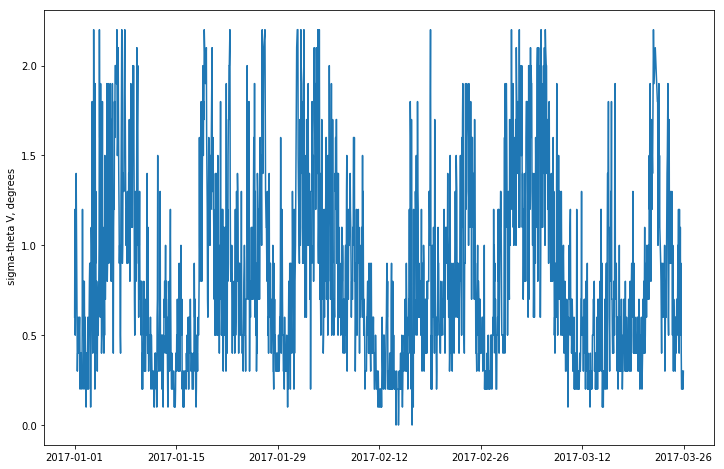

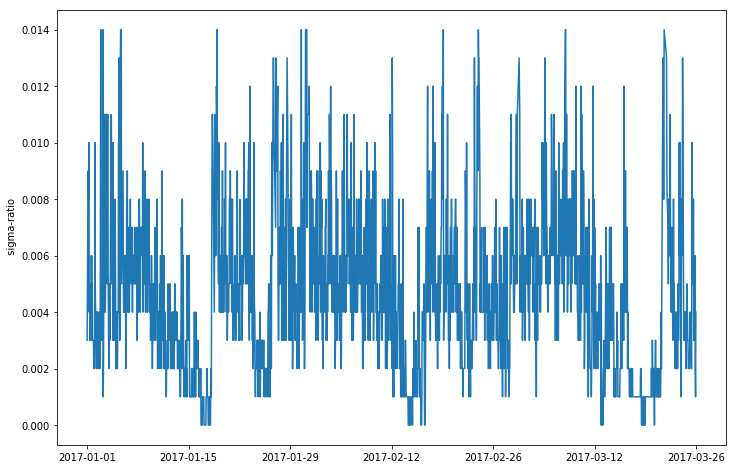

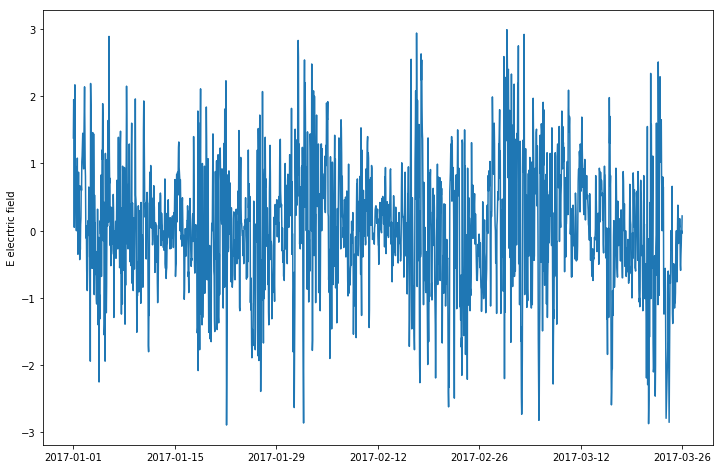

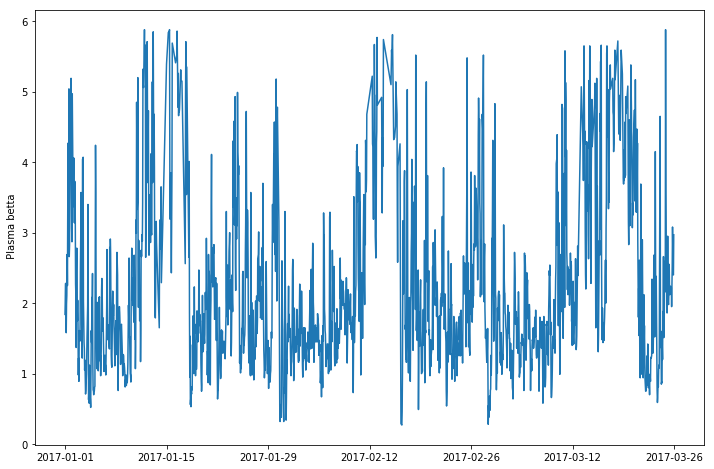

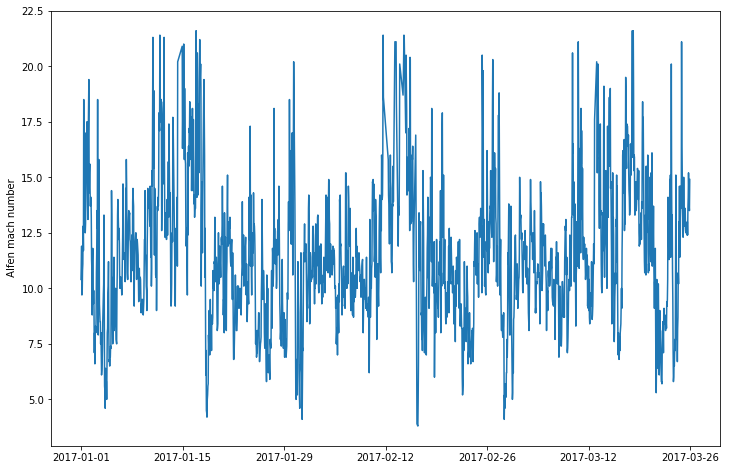

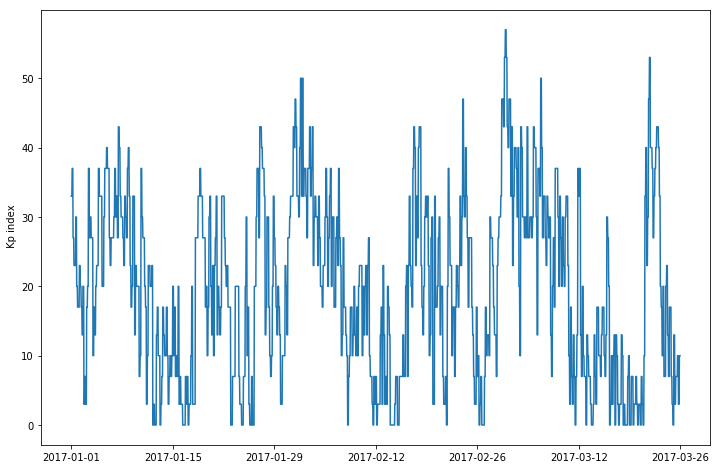

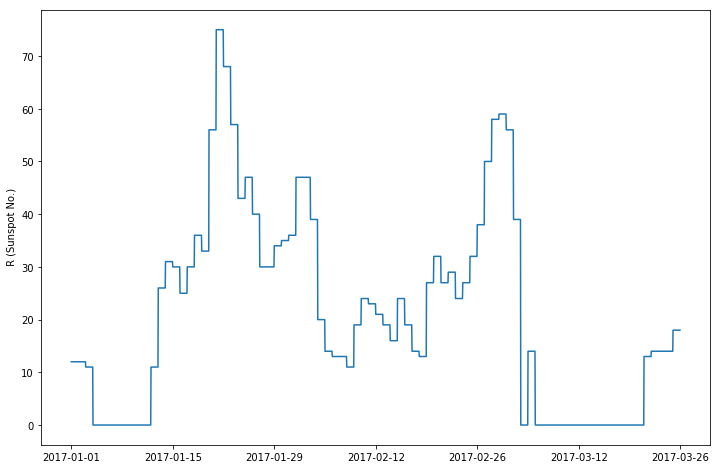

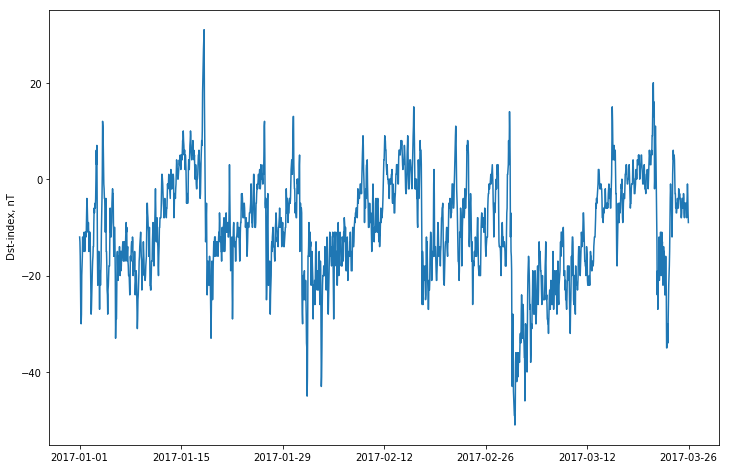

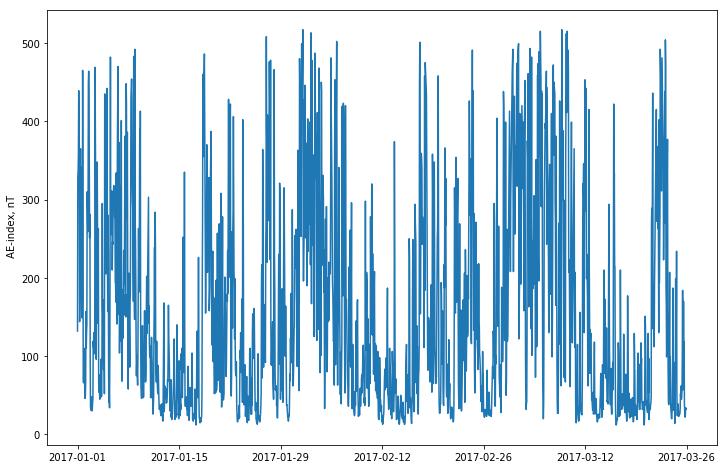

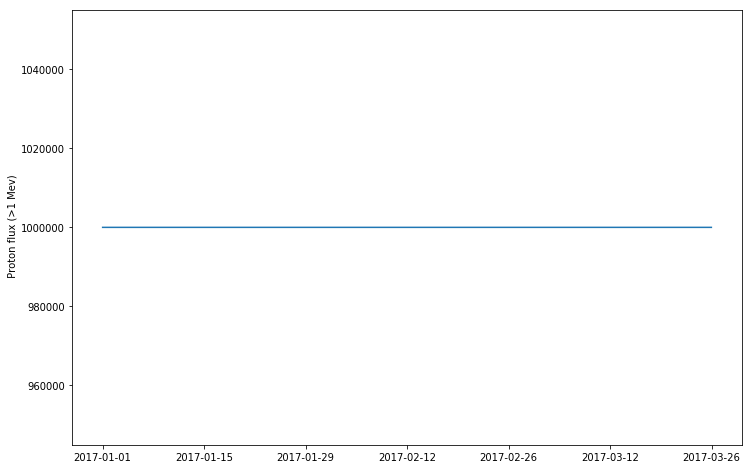

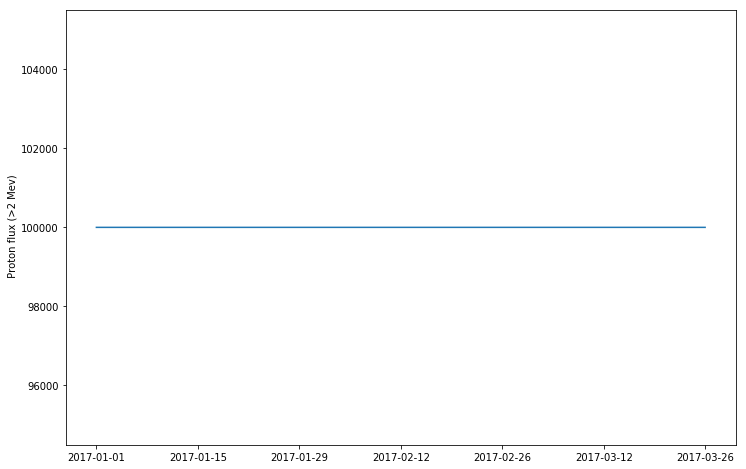

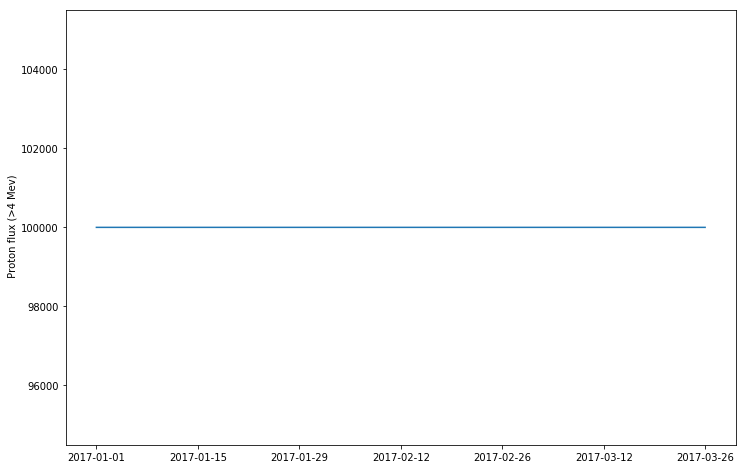

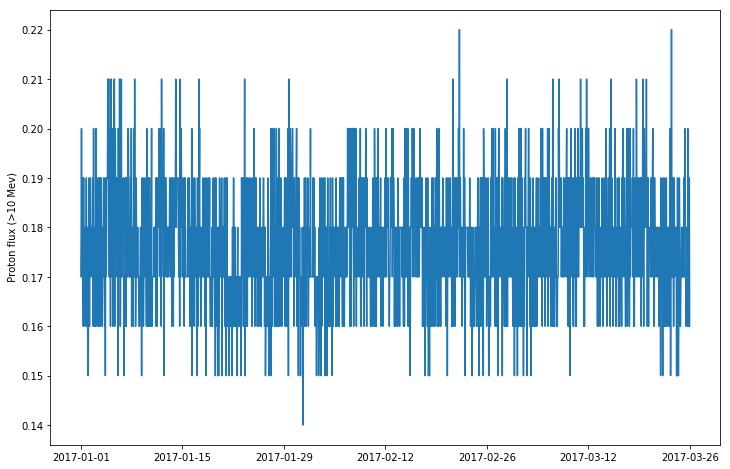

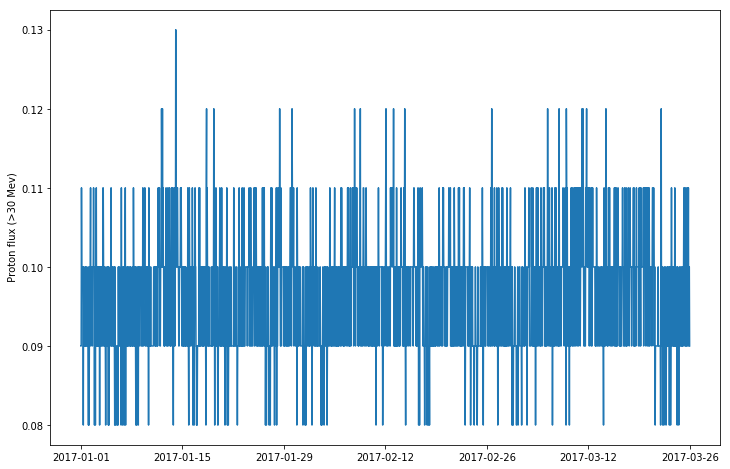

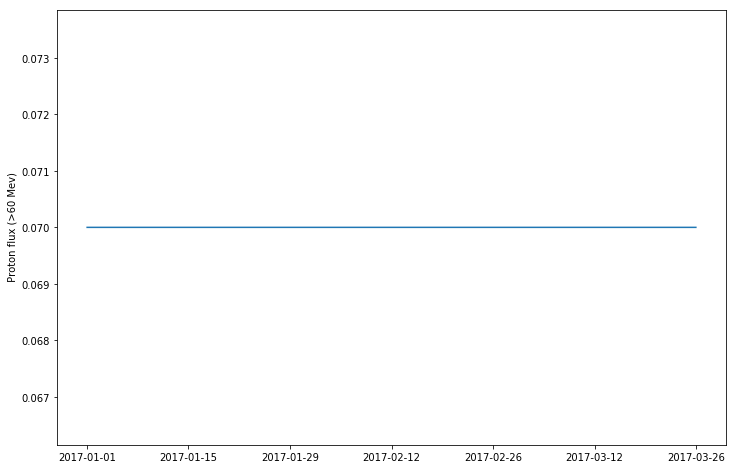

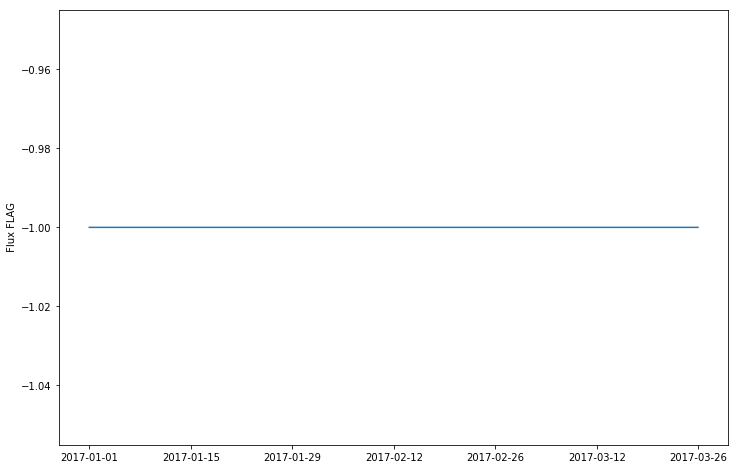

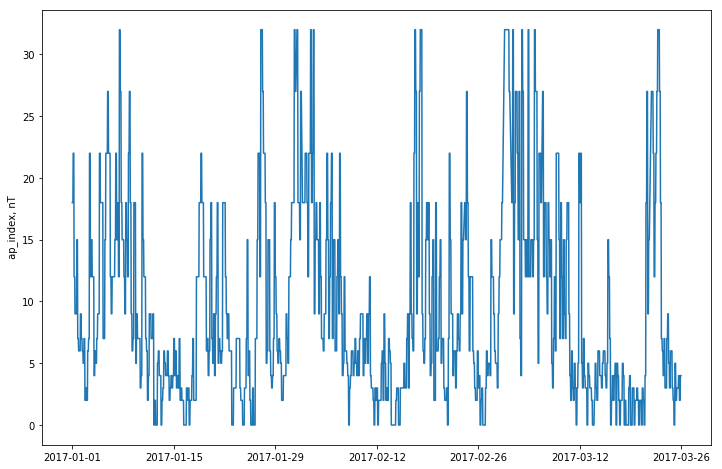

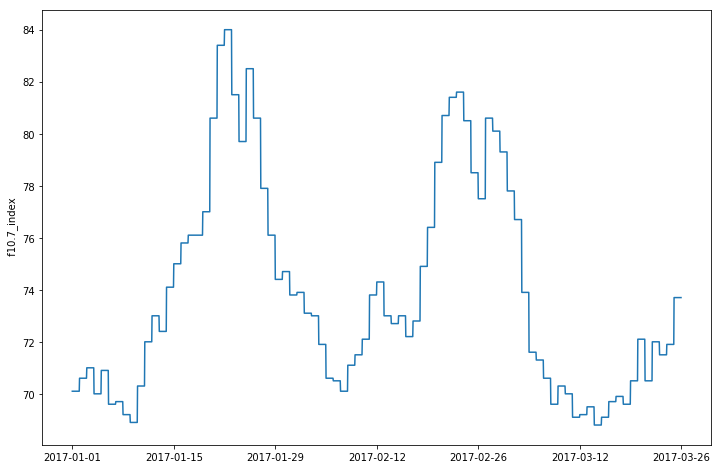

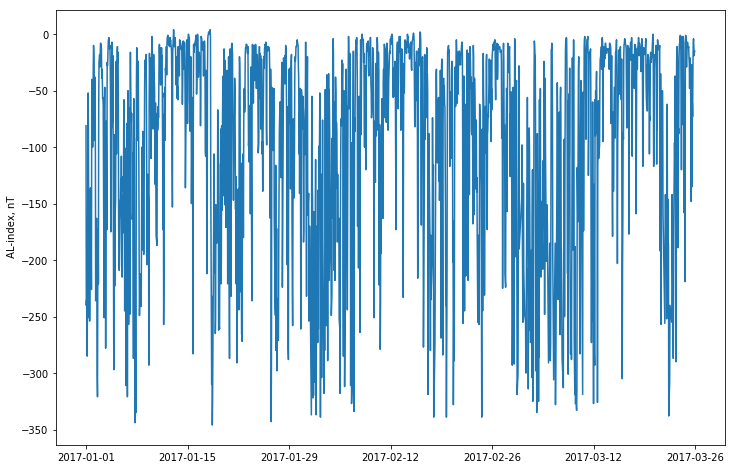

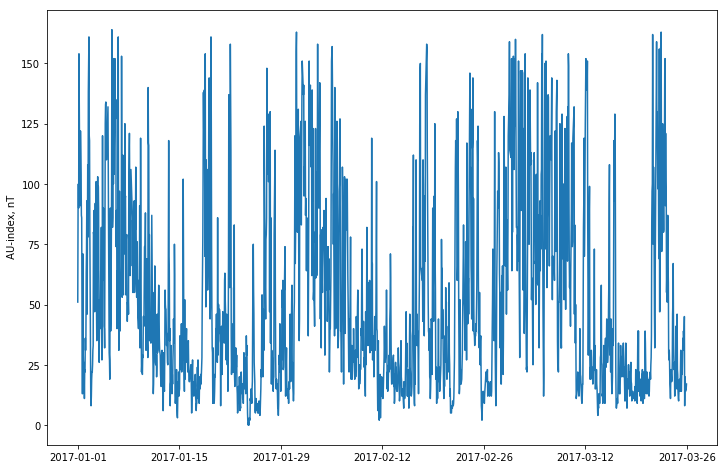

In [318]:
# _ind = 33

for _ind in omniweb_name.index+1:
    
    
    plt.figure(_ind, figsize=(12,8))
    plt.plot(omni_date[~is_outlier(omniweb[str(_ind)])],
             omniweb[str(_ind)][~is_outlier(omniweb[str(_ind)])])


    # plt.plot(pd.rolling_median(omniweb[str(_ind)], window=30, center=True),lw=1.5)
    # plt.plot(omni_date, omniweb[str(_ind)], ".")
    plt.ylabel(str(omniweb_name.iloc[_ind-1].values[0][2:]))



    # Parameter time derivative (assuming regular spacing)
#     plt.figure(figsize=(12,8))
#     plt.plot(np.gradient(pd.rolling_median(omniweb[str(_ind)][~is_outlier(omniweb[str(_ind)])], window=30, center=True)),lw=1.5)